# 네이버-창원대 NER 데이터셋
 https://ko-nlp.github.io/Korpora/ko-docs/corpuslist/naver_changwon_ner.html
 
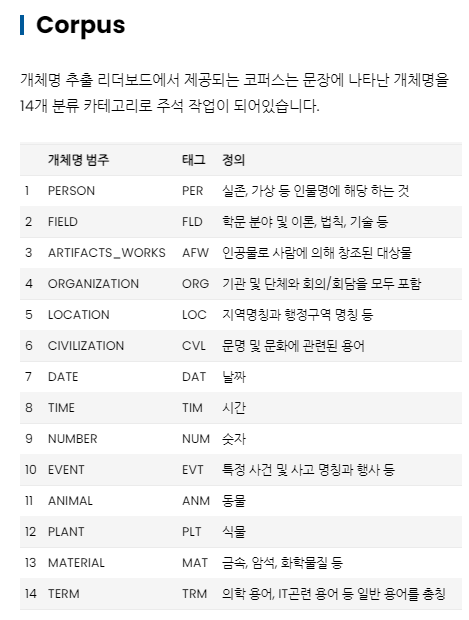

In [88]:
#!pip install korpora pandas tensorflow scikit-learn matplotlib

from Korpora import Korpora

ner_corpus = Korpora.load('naver_changwon_ner')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : 네이버 + 창원대
    Repository : https://github.com/naver/nlp-challenge/tree/master/missions/ner
    References : http://air.changwon.ac.kr/?page_id=10

    개체명(Named Entity)은 인명, 기관명, 지명 등과 같이 문장 또는 문서에서 특정한 의미를 가지고 있는 단어 또는 어구를 말합니다.
    이 때문에 개체명은 정보 검색 및 언어 이해를 위한 분석에서 주요한 대상으로 다루어지고 있습니다.
    Data.ly에서는 개체명 코퍼스를 제공하여 연구에 도움을 드리고자 하며, 공개적인 리더보드를 통해 많은 분들의 연구 동향을 논의/공유하고자 합니다.
    제공되는 코퍼스는 Data.ly에서 제작한 것으로, 연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.

    # License
    연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.

[Korpora] Corpus `naver_changwon_ner` is already installed at C:\Users\tjoeun\Korpora\naver_changwon_ner\train_data


In [89]:
ner_corpus.train[5]

WordTag(text="[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ' ", words=['[유로2008]', "'공인구가", '변할', '기록', '시정조치는', '죽을', '맛', '?', "'"], tags=['EVT_B', 'CVL_B', '-', '-', 'CVL_B', '-', '-', '-', '-'])

In [90]:
import pandas as pd

df_corpus = pd.DataFrame(ner_corpus.train)
df_corpus.head(5)


,text,words,tags
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율","[비토리오, 양일, 만에, 영사관, 감호, 용퇴,, 항룡, 압력설, 의심만, 가율]","[PER_B, DAT_B, -, ORG_B, CVL_B, -, -, -, -, -]"
1,이 음경동맥의 직경이 8 19mm입니다 .,"[이, 음경동맥의, 직경이, 8, 19mm입니다, .]","[-, -, -, NUM_B, NUM_B, -]"
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,"[9세이브로, 구완, 30위인, LG, 박찬형은, 평균자책점이, 16.45로, 준수...","[NUM_B, -, NUM_B, ORG_B, PER_B, -, NUM_B, -, -..."
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,"[7승, 25패는, 상트페테르부르크가, 역대, 월드리그에, 출진한, 분별, 최선의,...","[NUM_B, NUM_B, LOC_B, -, EVT_B, -, -, -, -, -]"
4,▲ 퍼거슨 씨족의 꾀,"[▲, 퍼거슨, 씨족의, 꾀]","[-, PER_B, CVL_B, -]"


In [91]:
print(df_corpus['text'][0])
print(df_corpus['words'][0])
print(df_corpus['tags'][0])


비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율 
['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']
['PER_B', 'DAT_B', '-', 'ORG_B', 'CVL_B', '-', '-', '-', '-', '-']


In [92]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

In [93]:
type(df_corpus['tags'][0])

list

In [94]:
# https://github.com/kimwoonggon/publicservant_AI/blob/master/5_(BERT_%EC%8B%A4%EC%8A%B5)%ED%95%9C%EA%B5%AD%EC%96%B4_%EA%B0%9C%EC%B2%B4%EB%AA%85_%EC%9D%B8%EC%8B%9D.ipynb
# !pip install transformers
# !pip install sentencepiece
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [95]:
print(df_corpus['text'][1])
print(df_corpus['words'][1])
print(df_corpus['tags'][1])

이 음경동맥의 직경이 8 19mm입니다 . 
['이', '음경동맥의', '직경이', '8', '19mm입니다', '.']
['-', '-', '-', 'NUM_B', 'NUM_B', '-']


In [96]:
print(df_corpus['words'][1][1])
print(df_corpus['tags'][1][1])

음경동맥의
-


In [97]:
index_num1, index_num2 = [], []
sentence_list, word_list, tag_list = [], [], []

for i in range(len(df_corpus)):
    for j in range(len(df_corpus['words'][i])):
        sentence_num = i
        word_num = j
        word = df_corpus['words'][i][j]
        tag = df_corpus['tags'][i][j]
        sentence = df_corpus['text'][i]

        index_num1.append(sentence_num)
        index_num2.append(word_num)
        sentence_list.append(sentence)
        word_list.append(word)
        tag_list.append(tag)

        

In [98]:
sentence_index_series = pd.Series(index_num1, name='sentence_num')
word_index_series = pd.Series(index_num2, name='word_num')
sentence_series = pd.Series(sentence_list, name='sentence')
word_series = pd.Series(word_list, name='word')
bio_tag_series = pd.Series(tag_list, name='bio_tag')

result_df = pd.concat([sentence_index_series, word_index_series, sentence_series, word_series, bio_tag_series], axis=1)


In [99]:
result_df

,sentence_num,word_num,sentence,word,bio_tag
0,0,0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",비토리오,PER_B
1,0,1,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",양일,DAT_B
2,0,2,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",만에,-
3,0,3,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",영사관,ORG_B
4,0,4,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",감호,CVL_B
...,...,...,...,...,...
1063566,89999,1,－（해설） 어째 뭔가 수상쩍은 좌담 ．,어째,-
1063567,89999,2,－（해설） 어째 뭔가 수상쩍은 좌담 ．,뭔가,-
1063568,89999,3,－（해설） 어째 뭔가 수상쩍은 좌담 ．,수상쩍은,-
1063569,89999,4,－（해설） 어째 뭔가 수상쩍은 좌담 ．,좌담,-


In [100]:
split_tags = result_df['bio_tag'].str.split('_', expand=True)

# 'tag1', 'tag2' 열 이름으로 열 추가
result_df['tag1'] = split_tags[0]
result_df['tag2'] = split_tags[1]


In [101]:
result_df

,sentence_num,word_num,sentence,word,bio_tag,tag1,tag2
0,0,0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",비토리오,PER_B,PER,B
1,0,1,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",양일,DAT_B,DAT,B
2,0,2,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",만에,-,-,None
3,0,3,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",영사관,ORG_B,ORG,B
4,0,4,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",감호,CVL_B,CVL,B
...,...,...,...,...,...,...,...
1063566,89999,1,－（해설） 어째 뭔가 수상쩍은 좌담 ．,어째,-,-,None
1063567,89999,2,－（해설） 어째 뭔가 수상쩍은 좌담 ．,뭔가,-,-,None
1063568,89999,3,－（해설） 어째 뭔가 수상쩍은 좌담 ．,수상쩍은,-,-,None
1063569,89999,4,－（해설） 어째 뭔가 수상쩍은 좌담 ．,좌담,-,-,None


In [102]:
result_df[50:80]

,sentence_num,word_num,sentence,word,bio_tag,tag1,tag2
50,5,5,[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ',죽을,-,-,None
51,5,6,[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ',맛,-,-,None
52,5,7,[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ',?,-,-,None
53,5,8,[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ',',-,-,None
54,6,0,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,로마올림픽에서,EVT_B,EVT,B
55,6,1,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,육미지황탕,TRM_B,TRM,B
56,6,2,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,이남지역으로,TRM_I,TRM,I
57,6,3,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,동메달에,CVL_B,CVL,B
58,6,4,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,머문,-,-,None
59,6,5,로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에...,추경대는,PER_B,PER,B


In [108]:
result_df['tag2'] = result_df['tag2'].apply(lambda x: 'O' if pd.isna(x) or x == 'None' else x)

In [109]:
result_df.head()

,sentence_num,word_num,sentence,word,bio_tag,tag1,tag2
0,0,0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",비토리오,PER_B,PER,B
1,0,1,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",양일,DAT_B,DAT,B
2,0,2,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",만에,-,-,O
3,0,3,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",영사관,ORG_B,ORG,B
4,0,4,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",감호,CVL_B,CVL,B


In [103]:
result_df.to_csv('data/ner_naver.csv', index = False)